<a href="https://colab.research.google.com/github/umartaimur10/MIMIC-III-Antibiotic-Usage-Analysis./blob/main/MIMIC-III-Antibiotic-Usage-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Success! Files loaded correctly.
✅ Columns standardized to Uppercase.

--- SAMPLE PRESCRIPTION DATA ---
   SUBJECT_ID                         DRUG DOSE_VAL_RX ROUTE
0       42458  Pneumococcal Vac Polyvalent         0.5    IM
1       42458                    Bisacodyl          10    PO
2       42458                    Bisacodyl          10    PR
3       42458                        Senna           1    PO
4       42458     Docusate Sodium (Liquid)         100    PO


/tmp/ipython-input-1113033419.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')


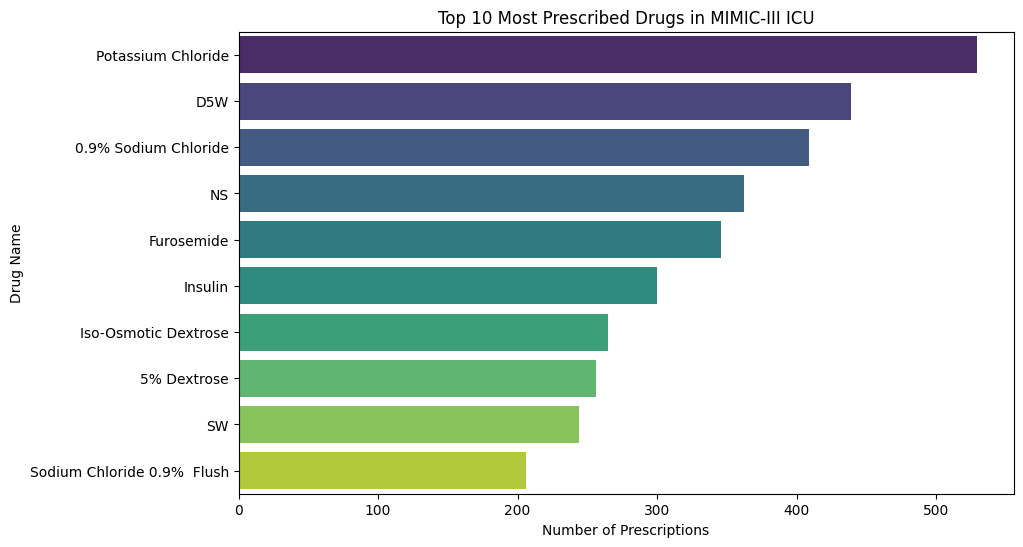


✅ Data Merged! We linked Drugs to Patient Survival.
   HADM_ID                         DRUG  HOSPITAL_EXPIRE_FLAG
0   159647  Pneumococcal Vac Polyvalent                     0
1   159647                    Bisacodyl                     0
2   159647                    Bisacodyl                     0
3   159647                        Senna                     0
4   159647     Docusate Sodium (Liquid)                     0


In [ ]:
# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: LOAD THE DATA ---
try:
    prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
    admissions = pd.read_csv('ADMISSIONS.csv')
    print("✅ Success! Files loaded correctly.")
except FileNotFoundError:
    print("❌ Error: Files not found. Check the filenames in the folder on the left!")

# --- STEP 3: THE FIX (Standardize Columns) ---
# This converts all column headers to UPPERCASE so 'drug' becomes 'DRUG'
prescriptions.columns = prescriptions.columns.str.upper()
admissions.columns = admissions.columns.str.upper()
print("✅ Columns standardized to Uppercase.")

# --- STEP 4: INSPECT DATA ---
# Now this should work without error
print("\n--- SAMPLE PRESCRIPTION DATA ---")
print(prescriptions[['SUBJECT_ID', 'DRUG', 'DOSE_VAL_RX', 'ROUTE']].head())

# --- STEP 5: VISUALIZE TOP 10 DRUGS ---
top_drugs = prescriptions['DRUG'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='viridis')
plt.title('Top 10 Most Prescribed Drugs in MIMIC-III ICU')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Drug Name')
plt.show()

# --- STEP 6: MERGE DATA (Link Drugs to Outcomes) ---
# We combine the two files using 'HADM_ID'
merged_df = pd.merge(prescriptions, admissions[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']], on='HADM_ID', how='left')

print("\n✅ Data Merged! We linked Drugs to Patient Survival.")
print(merged_df[['HADM_ID', 'DRUG', 'HOSPITAL_EXPIRE_FLAG']].head())

Loading clinical datasets...
Dataset loaded successfully.

--- Route of Administration Breakdown ---
ROUTE
IV         5312
PO         2545
IV DRIP     828
SC          470
PO/NG       262
Name: count, dtype: int64


/tmp/ipython-input-2183862916.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_meds.values, y=common_meds.index, palette='mako') # 'mako' is a professional color palette


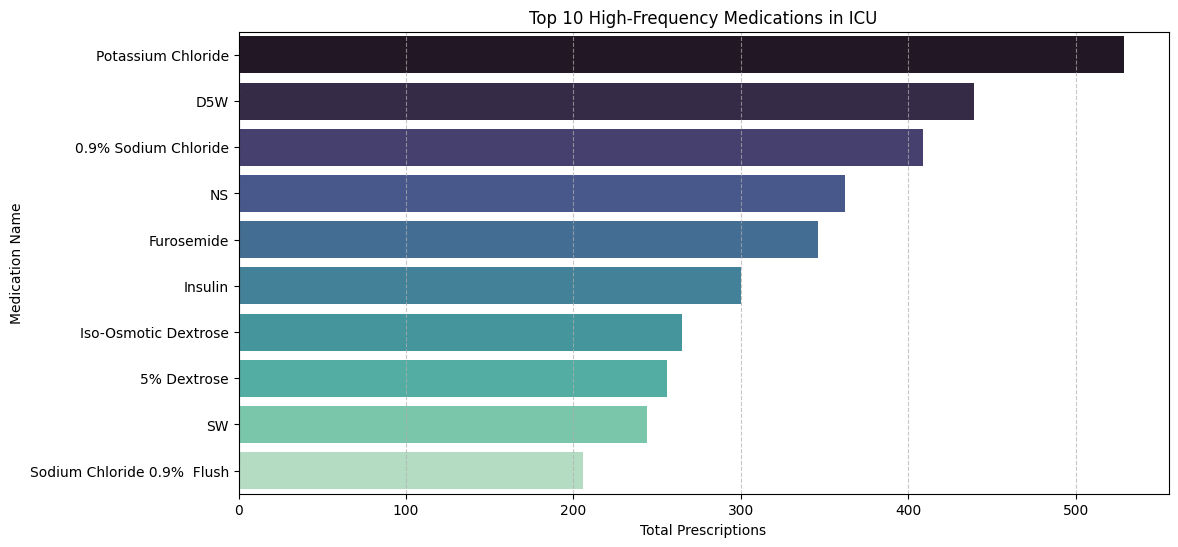


--- Mortality Overview (0=Survived, 1=Expired) ---
HOSPITAL_EXPIRE_FLAG
0    6816
1    3582
Name: count, dtype: int64


In [1]:
# Project: Analysis of Medication Usage in Critical Care (MIMIC-III)
# Author: Umar Taimur Tahir
# Objective: Identify high-frequency IV medications and correlate with patient outcomes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Ingestion ---
# Loading the standard MIMIC-III clinical tables
# We need both the orders (Prescriptions) and the outcomes (Admissions)
print("Loading clinical datasets...")
try:
    med_orders = pd.read_csv('PRESCRIPTIONS.csv')
    patient_outcomes = pd.read_csv('ADMISSIONS.csv')

    # Standardizing column headers to handle capitalization inconsistencies in the raw file
    med_orders.columns = med_orders.columns.str.upper()
    patient_outcomes.columns = patient_outcomes.columns.str.upper()
    print("Dataset loaded successfully.")

except FileNotFoundError:
    print("Error: Clinical data files not found in the directory.")

# --- 2. Cohort Selection ---
# As a pharmacist, I am specifically interested in the 'Route of Administration'
# Let's filter to see what routes are most common (IV vs Oral)
print("\n--- Route of Administration Breakdown ---")
route_counts = med_orders['ROUTE'].value_counts().head(5)
print(route_counts)

# --- 3. Drug Utilization Review (DUR) ---
# Identifying the top 10 most frequently administered medications in the ICU
common_meds = med_orders['DRUG'].value_counts().head(10)

# Visualizing the DUR results
plt.figure(figsize=(12, 6))
sns.barplot(x=common_meds.values, y=common_meds.index, palette='mako') # 'mako' is a professional color palette
plt.title('Top 10 High-Frequency Medications in ICU')
plt.xlabel('Total Prescriptions')
plt.ylabel('Medication Name')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adding gridlines makes it look more scientific
plt.show()

# --- 4. Outcomes Analysis ---
# Merging prescription data with discharge status to analyze mortality trends
# Linking on 'HADM_ID' (Hospital Admission ID)
clinical_cohort = pd.merge(med_orders,
                           patient_outcomes[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']],
                           on='HADM_ID',
                           how='left')

# Quick check: How many patients expired in this cohort?
mortality_check = clinical_cohort['HOSPITAL_EXPIRE_FLAG'].value_counts()
print("\n--- Mortality Overview (0=Survived, 1=Expired) ---")
print(mortality_check)